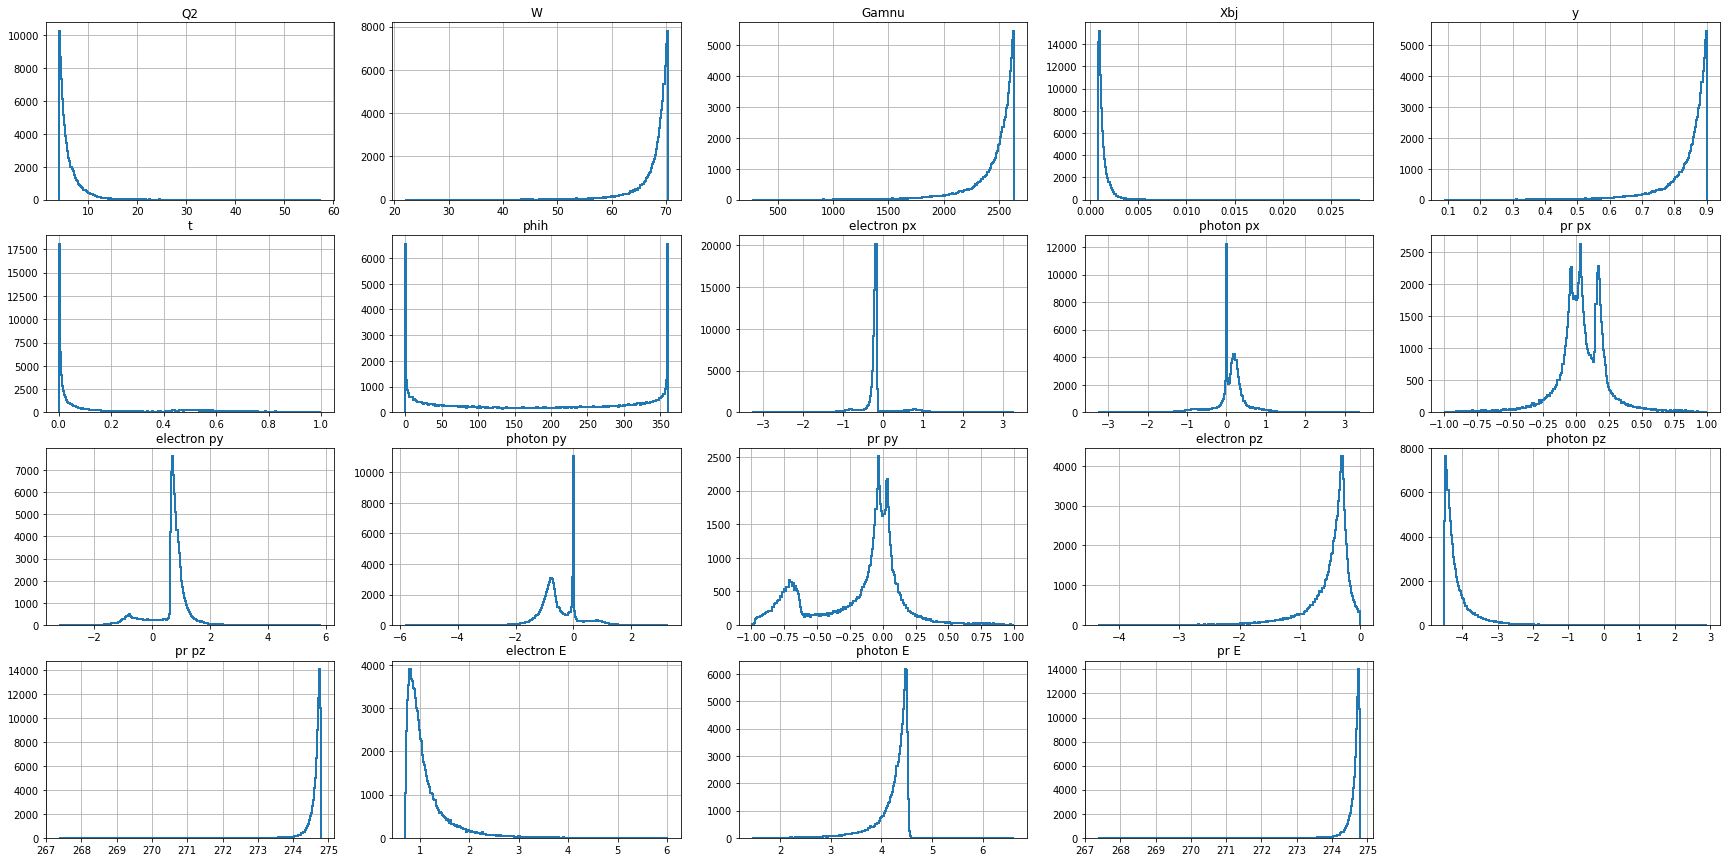

In [297]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as plticker
feature_names = ['Q2', 'W', 'Gamnu', 'Xbj', 'y', 't', 'phih', 
                'electron px', 'photon px', 'pr px', 
                'electron py', 'photon py', 'pr py', 
                'electron pz', 'photon pz', 'pr pz', 
                'electron E',  'photon E',  'pr E']
raw = np.load("../data/raw/X_train.npy")
f, axs = plt.subplots(4,5, figsize=(30,15)); axs = axs.flatten()
bins = 250
for i in range(raw.shape[1]):
    ax = axs[i]
    a, b, c = ax.hist(raw[:,i],histtype='step',bins=bins,label='real', linewidth=2)
    ax.grid(which='both')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # ax.xaxis.set_major_locator(plticker.MultipleLocator(base=int((xmax-xmin)*10)/60))
    # ax.xaxis.set_major_formatter(plticker.FormatStrFormatter('%0.1f'))
    # ax.yaxis.set_major_locator(plticker.MultipleLocator(base=int((ymax-ymin)/50)*10))
    # ax.yaxis.set_major_formatter(plticker.FormatStrFormatter('%.0i'))
    # ax.set_yscale('log')
    ax.set_title(feature_names[i])
axs[-1].axis('off')
f.savefig("../imgs/raw_features.png", bbox_inches='tight')

In [298]:
data1 = raw
data1 = raw[raw[:, -2] < 4.6, :]

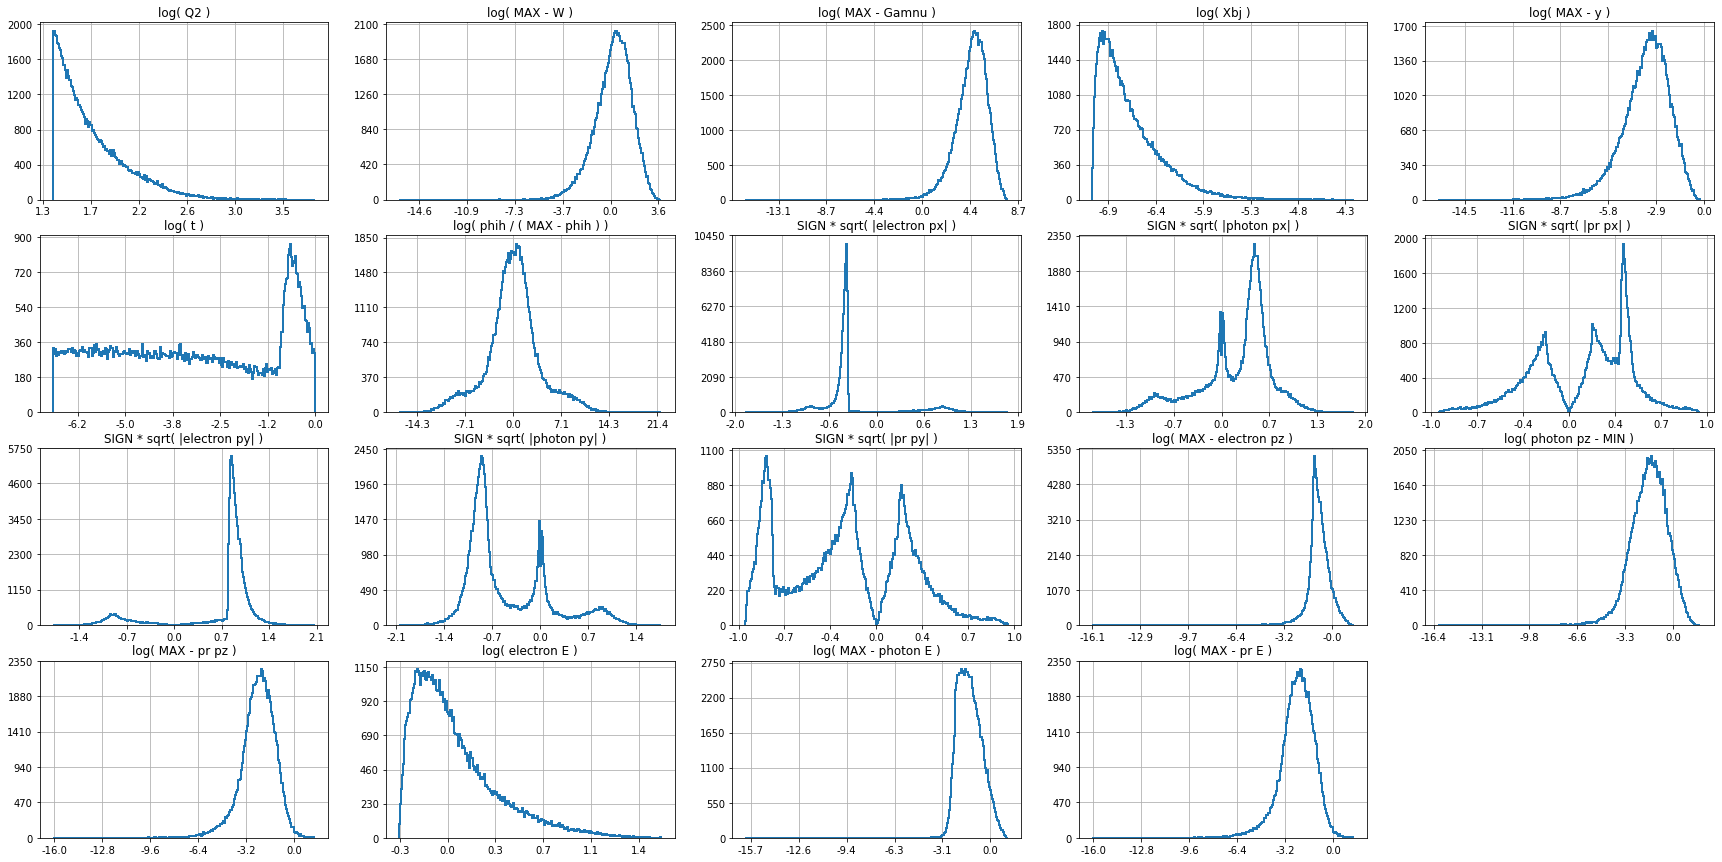

In [299]:

f, axs = plt.subplots(4,5, figsize=(30,15)); axs = axs.flatten()

data2 = data1.copy()
aug_names = feature_names.copy()
eps=1e-7

for i in range(len(aug_names)):
    name, d = aug_names[i], data2[:,i]

    if name in ["W", "Gamnu", "y", "electron pz", "pr pz", "photon E", "pr E"]:
        d = np.max(d) - d
        aug_names[i] = f"MAX - {aug_names[i]}"
    if name in ['photon pz']:
        d = d - np.min(d)
        aug_names[i] = aug_names[i]+" - MIN"
    if name in ['Q2', 'W', 'Gamnu', 'Xbj', 'y', 't', 'electron pz', 'photon pz', 'pr pz', 'electron E',  'photon E',  'pr E' ]:
        d = np.log(d + eps)
        aug_names[i] = f"log( {aug_names[i]} )"
  
    if name in ['phih']:
        d = np.log(d/(360.0-d+eps))
        aug_names[i] = f"log( {aug_names[i]} / ( MAX - {aug_names[i]} ) )"
    if name in ['electron px', 'photon px', 'pr px', 'electron py', 'photon py', 'pr py']:
        d = np.sign(d) * np.abs(d)**.5
        # d = np.sign(d) * np.log(np.abs(d) + 1)
        aug_names[i] = f"SIGN * sqrt( |{aug_names[i]}| )"
    
    if np.isnan(d).any():
        print(name)
    data2[:,i] = d

# data2 = np.log(sclr.fit_transform(data2))

for i in range(data2.shape[1]):
    ax = axs[i]
    a, b, c = ax.hist(data2[:,i],histtype='step',bins=bins,label='real', linewidth=2)
    ax.grid(which='both')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=int((xmax-xmin)*10)/60))
    ax.xaxis.set_major_formatter(plticker.FormatStrFormatter('%0.1f'))
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=int((ymax-ymin)/50)*10))
    ax.yaxis.set_major_formatter(plticker.FormatStrFormatter('%.0i'))
    ax.set_title(aug_names[i])
axs[-1].set_axis_off()
f.savefig("../imgs/aug_features.png", bbox_inches='tight')


In [300]:
sclr = MinMaxScaler(feature_range=(-1,1))
data_auged_scaled = sclr.fit_transform(data2)
np.save("../data/processed/X_train_custom.npy", data_auged_scaled)
aug_names

['log( Q2 )',
 'log( MAX - W )',
 'log( MAX - Gamnu )',
 'log( Xbj )',
 'log( MAX - y )',
 'log( t )',
 'log( phih / ( MAX - phih ) )',
 'SIGN * sqrt( |electron px| )',
 'SIGN * sqrt( |photon px| )',
 'SIGN * sqrt( |pr px| )',
 'SIGN * sqrt( |electron py| )',
 'SIGN * sqrt( |photon py| )',
 'SIGN * sqrt( |pr py| )',
 'log( MAX - electron pz )',
 'log( photon pz - MIN )',
 'log( MAX - pr pz )',
 'log( electron E )',
 'log( MAX - photon E )',
 'log( MAX - pr E )']

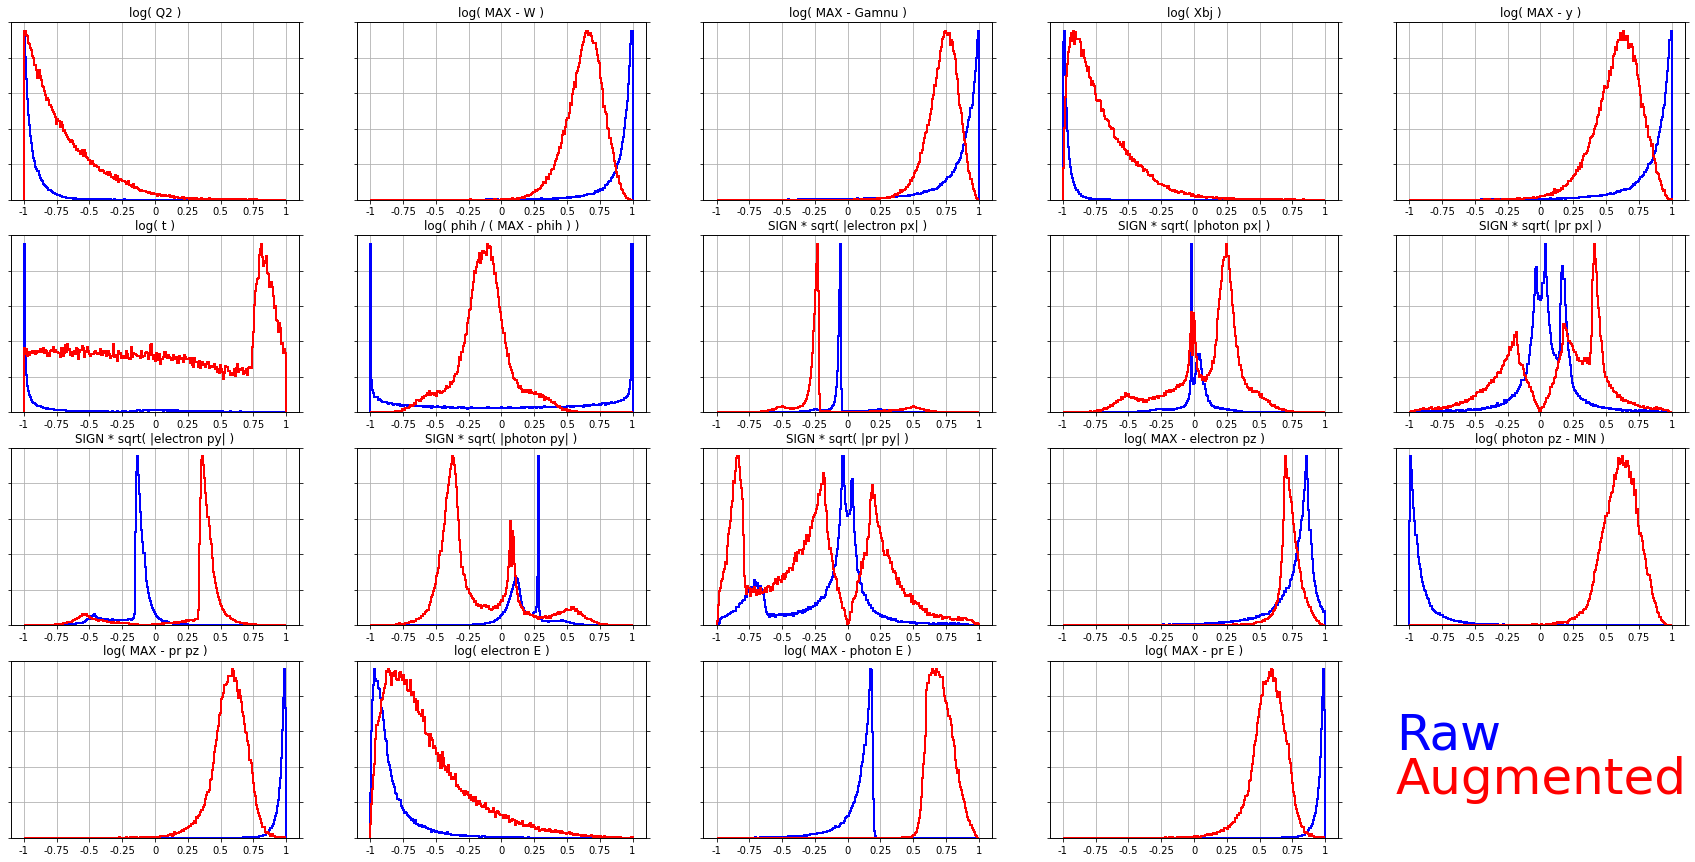

In [337]:
f, axs = plt.subplots(4,5, figsize=(30,15)); axs = axs.flatten();# f.tight_layout
raw_scaled = sclr.fit_transform(raw)
for i in range(data2.shape[1]):
    ax = axs[i]
    a, b, c = ax.hist(raw_scaled[:,i],histtype='step',bins=bins,label='raw', color='blue', linewidth=2)
    ax.grid(which='both')
    ax.set_xlim([-1.1, 1.1])
    ax.set_yticklabels([])
    ax.xaxis.set_major_formatter(plticker.FormatStrFormatter('%0.2g'))
    ax.set_yticks(np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],6))
    ax.set_title(aug_names[i])
    
    ax2 = ax.twinx()
    a, b, c = ax2.hist(data_auged_scaled[:,i],histtype='step',bins=bins,label='augmented', color='red', linewidth=2)
    ax2.set_yticks(np.linspace(ax2.get_ylim()[0],ax2.get_ylim()[1],6))
    ax2.set_yticklabels([])
    

axs[-1].set_axis_off()
axs[-1].text(0, 0.5, "Raw", size=50, color='blue')
axs[-1].text(0, 0.25, "Augmented", size=50, color='red')
f.savefig("../imgs/raw_and_aug_features.png", bbox_inches='tight')

In [343]:
from modules.wgan_gp import WGAN

ModuleNotFoundError: No module named 'modules'